In [ ]:

CUDA_VISIBLE_DEVICES=5 /storage/arkady/miniconda3/envs/VideoMusic/bin/python3 /storage/arkady/Glinka/music-transformer/video_conditioning/gen_script_video.py '/storage/arkady/Glinka/music-transformer/video_conditioning/model/epoch_0037.pickle' 77777 0 11 'best4videos' 'video_ad14_rs2' '/storage/arkady/Glinka/music-transformer/video_conditioning/content/video_data/video_ad14.mp4' 2


CUDA_VISIBLE_DEVICES=5 /storage/arkady/miniconda3/envs/VideoMusic/bin/python3 /storage/arkady/Glinka/music-transformer/video_conditioning/gen_script_video.py '/storage/arkady/Glinka/music-transformer/video_conditioning/model/epoch_0037.pickle' 77777 0 11 'best4videos' 'video_ad14_rs3' '/storage/arkady/Glinka/music-transformer/video_conditioning/content/video_data/video_ad14.mp4' 3


CUDA_VISIBLE_DEVICES=5 /storage/arkady/miniconda3/envs/VideoMusic/bin/python3 /storage/arkady/Glinka/music-transformer/video_conditioning/gen_script_video.py '/storage/arkady/Glinka/music-transformer/video_conditioning/model/epoch_0037.pickle' 77777 0 11 'best4videos' 'video_ad14_rs4' '/storage/arkady/Glinka/music-transformer/video_conditioning/content/video_data/video_ad14.mp4' 4


CUDA_VISIBLE_DEVICES=5 /storage/arkady/miniconda3/envs/VideoMusic/bin/python3 /storage/arkady/Glinka/music-transformer/video_conditioning/gen_script_video.py '/storage/arkady/Glinka/music-transformer/video_conditioning/model/epoch_0037.pickle' 77777 0 11 'best4videos' 'video_ad14_rs5' '/storage/arkady/Glinka/music-transformer/video_conditioning/content/video_data/video_ad14.mp4' 5


CUDA_VISIBLE_DEVICES=5 /storage/arkady/miniconda3/envs/VideoMusic/bin/python3 /storage/arkady/Glinka/music-transformer/video_conditioning/gen_script_video.py '/storage/arkady/Glinka/music-transformer/video_conditioning/model/epoch_0037.pickle' 77777 0 11 'best4videos' 'video_ad14_rs6' '/storage/arkady/Glinka/music-transformer/video_conditioning/content/video_data/video_ad14.mp4' 6


In [1]:
from PIL import Image, ImageTk
from pathlib import Path

In [10]:
from .CONSTANTS import f

ImportError: attempted relative import with no known parent package

In [14]:
import json

json.dump(d, open('d.json', 'w'))

In [15]:
dd = json.load(open('d.json', 'r'))
dd, d
for a in [1]:
    asd

({'2': 23}, defaultdict(int, {2: 23}))

In [2]:
!which python

/storage/arkady/miniconda3/envs/transformer_production/bin/python


In [16]:
import subprocess

subprocess.run([
    # 'which python',
    # 'conda activate VideoMusic',
    # 'which python',
    'cd ..; pwd'
    # '''
    # bash -c "conda init; conda activate base; which python"
    # '''
], shell=True, capture_output=True, text=True)

CompletedProcess(args=['cd ..; pwd'], returncode=0, stdout='/storage/arkady/Glinka/music-transformer\n', stderr='')

In [34]:
s = '''
if __name__ == '__main__':
    print(1/0)
    print('unreachable')
'''

!echo "{s}" > __test.py

In [36]:
!python3 __test.py

Traceback (most recent call last):
  File "__test.py", line 3, in <module>
    print(1/0)
ZeroDivisionError: division by zero


In [42]:
proc = subprocess.run([
    'python3 __test.py',
    'echo 12345'
], shell=True, capture_output=True, check=True)

print(1234)
proc

CalledProcessError: Command '['python3 __test.py', 'echo 12345']' returned non-zero exit status 1.

In [14]:
from CONSTANTS import PYTHON_TRANSFORMER_PRODUCTION

PYTHON_TRANSFORMER_PRODUCTION

'/storage/arkady/miniconda3/envs/transformer_production/bin/python'

# kvm plot

In [1]:
%matplotlib inline

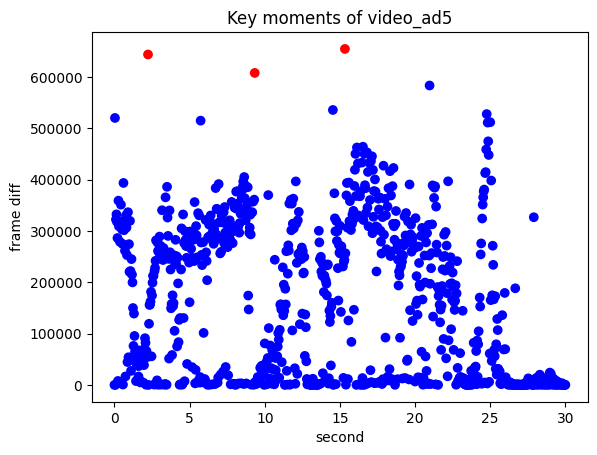

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

name = f'video_ad{[5, 14, 17, 25][0]}'
df = pd.read_csv(f'best4videos/{name}/kvm2.csv')
df

plt.scatter(
	df.index / df.iloc[-1, -1],
	df['frame_diff'], 
	c=['r' if k else 'b' for k in df['key_moment']]
	# c=[]
)
plt.title('Key moments of ' + name)
plt.xlabel('second')
plt.ylabel('frame diff')
plt.show()

# e_piano_small

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/storage/arkady/datasets/e_piano_small_kek/train/(Day_Dream)_Prayer.tsv', sep='\t')
df

,tokens,timings,nnotes,harmony,sentiments,tonality
0,387,0,0,24,2,12
1,62,0,1,24,2,12
2,387,0,1,24,2,12
3,67,0,2,24,2,12
4,387,0,2,24,2,12
...,...,...,...,...,...,...
1245,337,127,3,24,2,12
1246,187,127,2,24,2,12
1247,190,127,1,24,2,12
1248,257,127,1,24,2,12


In [59]:
from torch import arange, cumsum, zeros_like
import torch
from collections import deque
import types
RANGE_NOTE_ON = 128
RANGE_NOTE_OFF = 128
RANGE_TIME_SHIFT = 100
RANGE_VEL = 32
START_IDX = types.MappingProxyType({
    'note_on': 0,
    'note_off': RANGE_NOTE_ON,  # 128
    'time_shift': RANGE_NOTE_ON + RANGE_NOTE_OFF,  # 256
    'velocity': RANGE_NOTE_ON + RANGE_NOTE_OFF + RANGE_TIME_SHIFT,  # 356
    'end_of_scope': RANGE_NOTE_ON + RANGE_NOTE_OFF + RANGE_TIME_SHIFT + RANGE_VEL  # 388 noqa: E501
})
min_time_value = START_IDX['time_shift']
max_time_value = START_IDX['velocity'] - 1
min_note_on = START_IDX['note_on']
max_note_on = START_IDX['note_off'] - 1
min_note_off = START_IDX['note_off']
max_note_off = START_IDX['time_shift'] - 1
min_velocity = START_IDX['velocity']
max_velocity = START_IDX['end_of_scope'] - 1

def timing_feature(tokens):
    """Get timing feature from token sequences.

    Get timing in range [0, total_duration] for every token.

    Args:
        tokens: 1d Tensor or np.ndarray of sequence of tokens

    Returns:
        sequence of timings and total_duration
    """
    times = zeros_like(tokens)
    times[1:] = tokens[:-1].detach().clone()  # noqa: WPS362
    not_time_tokens_idx = (min_time_value > times) | (times > max_time_value)
    times -= min_time_value - 1
    times[not_time_tokens_idx] = 0
    res = cumsum(times, dim=0)
    # res = times
    return res, res[-1].item()

def notes_duration(tokens, window_size=5):
    """Creates last notes duration feature.

    Feature is a mean value of n last notes durations.
    n = 5 by default.

    Args:
        tokens: 1d Tensor of sequence of tokens
        window_size: number of last notes durations to use

    Returns:
        notes' types Tensor
    """
    time = 0
    notes_starts = {}
    mean_durations = zeros_like(tokens)
    durations_window = deque()
    for idx, token in enumerate(tokens):
        token = token.item()
        if min_note_on <= token <= max_note_on:
            token -= min_note_on
            if token not in notes_starts:
                notes_starts[token] = time
        elif min_note_off <= token <= max_note_off:
            token -= min_note_off
            if token in notes_starts:
                duration = time - notes_starts[token]
                del notes_starts[token]
                durations_window.append(duration)
                if len(durations_window) > window_size:
                    durations_window.popleft()
        elif min_time_value <= token <= max_time_value:
            time += token - min_time_value + 1
        mean_duration = sum(durations_window) / len(durations_window) if durations_window else 0
        mean_durations[idx] = round(mean_duration)
    mean_durations[mean_durations > 200] = 200
    return mean_durations

timing = timing_feature(torch.Tensor(df['tokens']))

df['timing'] = timing[0] / timing[1]
df['duration'] = notes_duration(torch.Tensor(df['tokens']))
df.iloc[:20]

,tokens,timings,nnotes,harmony,sentiments,tonality,timing,duration
0,387,0,0,24,2,12,0.000000,0.0
1,62,0,1,24,2,12,0.000000,0.0
2,387,0,1,24,2,12,0.000000,0.0
3,67,0,2,24,2,12,0.000000,0.0
4,387,0,2,24,2,12,0.000000,0.0
5,59,0,3,24,2,12,0.000000,0.0
6,355,0,3,0,1,0,0.000000,0.0
7,355,0,3,0,1,0,0.003229,0.0
8,355,0,3,0,1,0,0.006458,0.0
9,355,1,3,24,2,12,0.009686,0.0


# train loss results

In [61]:
pd.read_csv('/storage/naumtsevalex/saved_models/maxMelody_epoch_40_warm_10000_batch_8/results/results.csv')

,Epoch,Learn rate,Avg Train loss,Train Accuracy,Avg Eval loss,Eval accuracy
0,0,0.000000,tensor(6.0955),tensor(0.0030),tensor(6.0983),tensor(0.0025)
1,1,0.000080,tensor(3.3372),tensor(0.1702),tensor(3.3494),tensor(0.1677)
2,2,0.000160,tensor(2.4207),tensor(0.3537),tensor(2.4381),tensor(0.3474)
3,3,0.000240,tensor(2.0246),tensor(0.4548),tensor(2.0375),tensor(0.4520)
4,4,0.000320,tensor(1.9043),tensor(0.4781),tensor(1.9215),tensor(0.4742)
5,5,0.000342,tensor(1.8192),tensor(0.4937),tensor(1.8357),tensor(0.4895)
6,6,0.000313,tensor(1.7427),tensor(0.5072),tensor(1.7669),tensor(0.5012)
7,7,0.000289,tensor(1.6920),tensor(0.5155),tensor(1.7191),tensor(0.5087)
8,8,0.000271,tensor(1.6560),tensor(0.5223),tensor(1.6882),tensor(0.5146)
9,9,0.000255,tensor(1.6285),tensor(0.5284),tensor(1.6667),tensor(0.5194)


# train.py inspection

In [68]:
!pwd

/storage/arkady/Glinka/music-transformer/video_conditioning
